In [96]:
# Bibliotecas

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# **ETAPA 1**

In [4]:
dados = pd.read_excel('/data.xlsx')

In [5]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
dados.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
# Informações e análise dos tipos de dados

dados.info()
print('---------------------')
dados.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
---------------------


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [8]:
dados.replace('', np.nan)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
# Entendendo variáveis

round(dados.describe(), 2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [10]:
# Identificação dos valores nulos

dados_missing = (
dados.isna().sum()
.to_frame('missing_data')
.join((dados.isna().sum() / dados.shape[0]).to_frame('missing_pct'))
.sort_values('missing_data', ascending=False)
)

dados_missing.style.format('{:.2%}', subset='missing_pct')

,missing_data,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [11]:
# Porcentagem dos valores nulos

dados.isna().sum() / dados.shape[0]*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


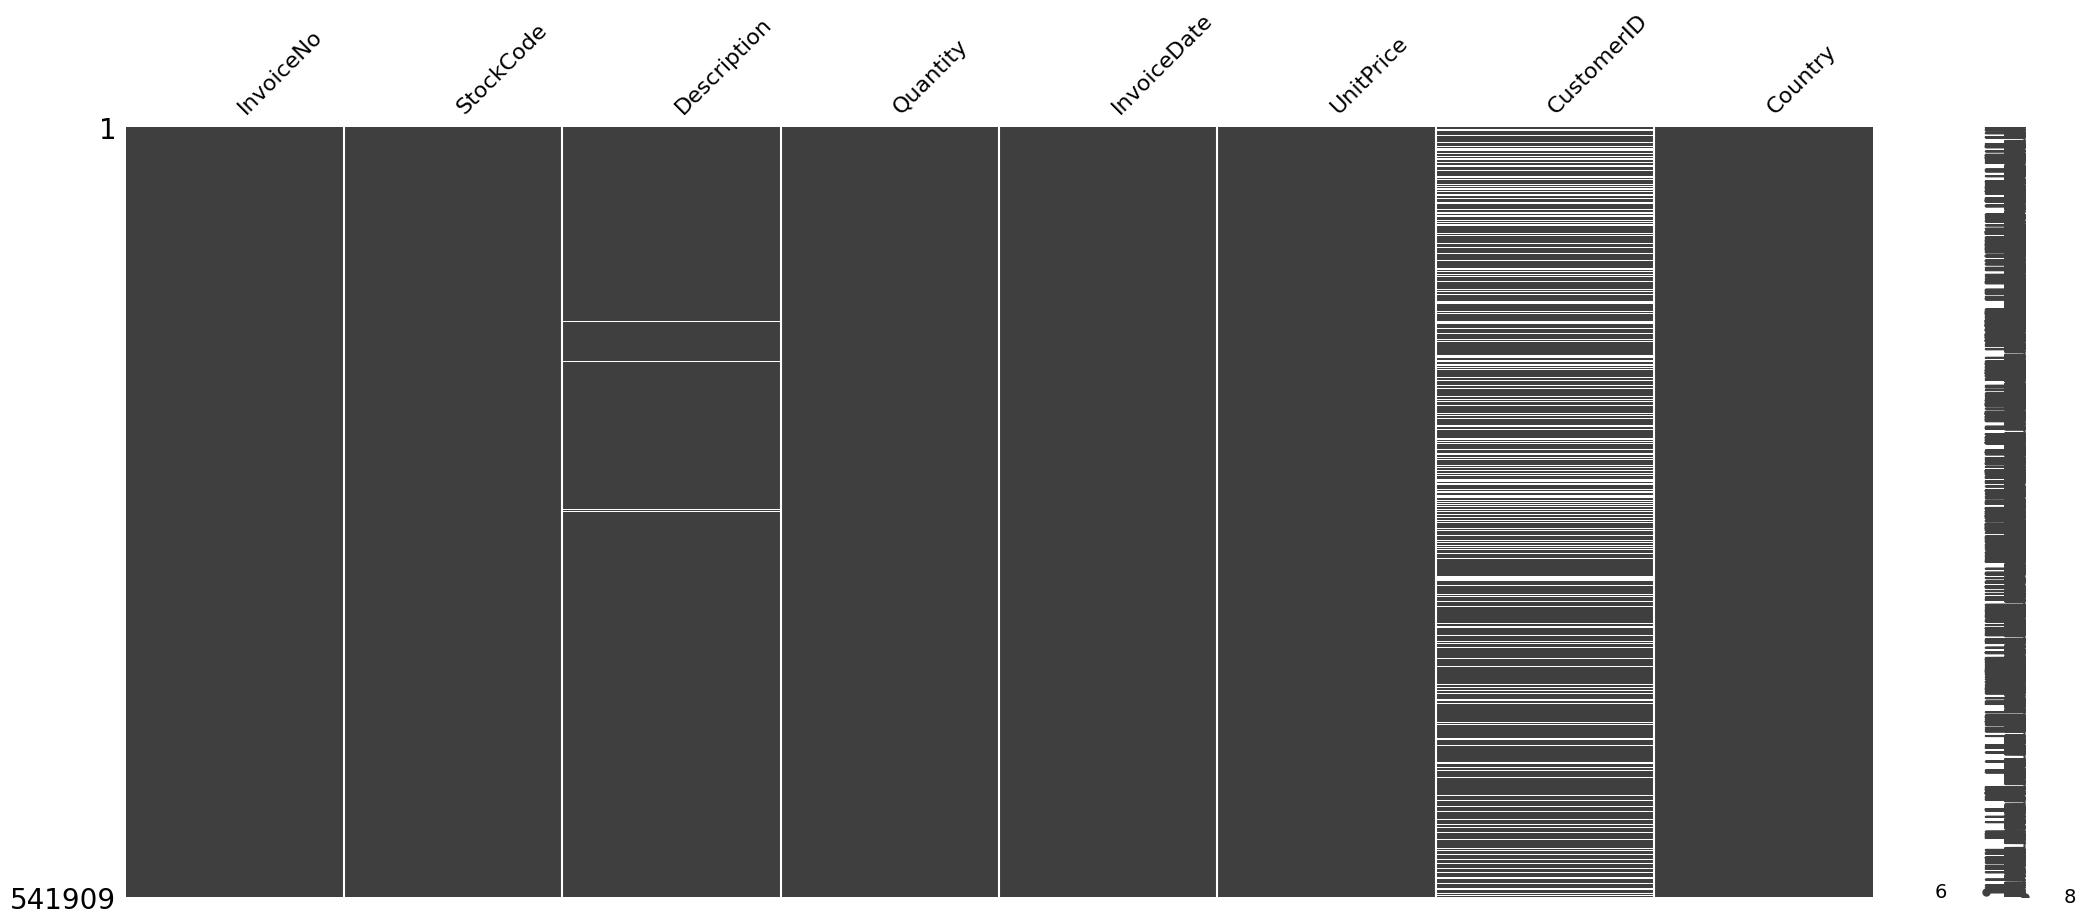

In [12]:
# Distribuição dos valores nulos

msno.matrix(dados);

In [13]:
#Qtd de linhas com dados nulos

dados[dados.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [14]:
#Qtd de linhas com Description nulos

dados[dados.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


# **ETAPA 2**

In [15]:
#Qtd de linhas com CustomerID nulos

dados[dados.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [41]:
# Removendo CustomerID nulos:

dados.dropna(subset=['CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **ETAPA 3**

In [42]:
# Verificando se há preços unitários iguais ou menores que 0

(dados['UnitPrice'] <= 0).sum()

0

In [43]:
# Verificando se há quantidade de produtos iguais ou menores que 0

(dados['Quantity'] <= 0).sum()

0

In [44]:
# Dataset filtrado com preços e quantidades somente acima de 0

dados[(dados['UnitPrice'] > 0) & (dados['Quantity'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [45]:
# Excluindo as linhas que contenham valores inferiores ou igual a zero:

linhas_a_excluir = (dados['UnitPrice'] <= 0) | (dados['Quantity'] <= 0)
dados.drop(dados[linhas_a_excluir].index, inplace=True)
print(dados)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

# **ETAPA 4**

In [46]:
# Verificação de linhas duplicadas

dados[dados.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [47]:
# Remoção de linhas duplicadas:

dados.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **ETAPA 5**

In [48]:
# Verificação dos tipos de dados das colunas

print(dados.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [55]:
# Correção dos tipos de dados

pd.to_datetime(dados['InvoiceDate'])

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


# **ETAPA 6**

<Axes: >

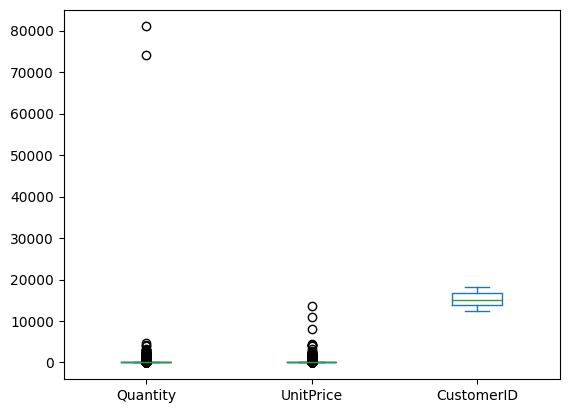

In [62]:
# Vizualização de outliers

dados.plot.box()

In [73]:
# Remoção de Outliers

dados[~((dados['Quantity'] > 10000) & (dados['UnitPrice'] > 5000))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **ETAPA 7**

In [80]:
# Preço total das compras

dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']
print(dados)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice 

# **ETAPA 8**

In [81]:
# última data:

dados['InvoiceDate'].max()

'9/9/2011 9:52'

# **ETAPA 9**

           Country   TotalPrice
36  United Kingdom  9025222.084
24     Netherlands   285446.340
10            EIRE   283453.960
14         Germany   228867.140
13          France   209715.110
0        Australia   138521.310
31           Spain    61577.110
33     Switzerland    57089.900
3          Belgium    41196.340
32          Sweden    38378.330


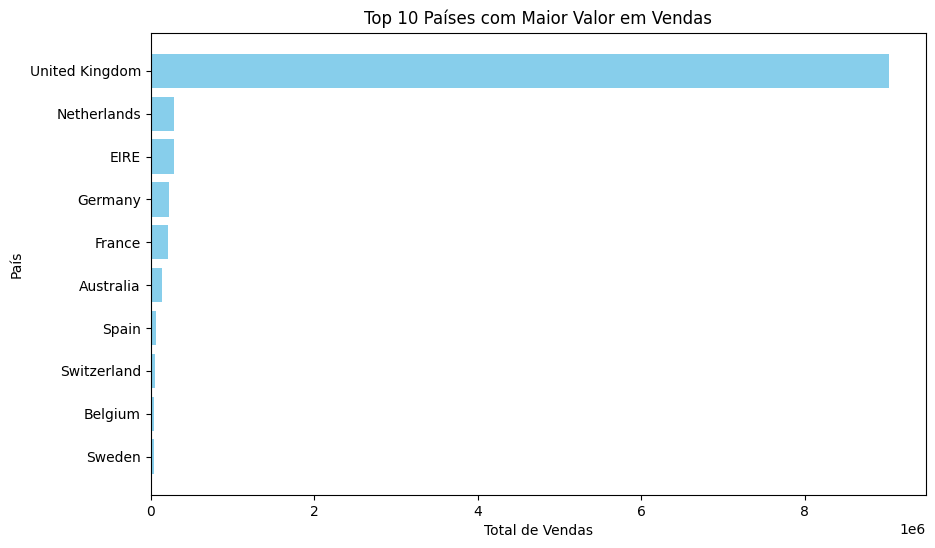

In [88]:
# Top 10 países com maior valor em vendas

country_sales = dados.groupby('Country')['TotalPrice'].sum().reset_index()
country_sales = country_sales.sort_values('TotalPrice', ascending=False)
top_10_countries = country_sales.head(10)
print(top_10_countries)

plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country'], top_10_countries['TotalPrice'], color='skyblue')
plt.xlabel('Total de Vendas')
plt.ylabel('País')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.gca().invert_yaxis()
plt.show()

                             Description  Quantity
2382         PAPER CRAFT , LITTLE BIRDIE     80995
2047      MEDIUM CERAMIC TOP STORAGE JAR     78033
3929   WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
1811             JUMBO BAG RED RETROSPOT     48474
3839  WHITE HANGING HEART T-LIGHT HOLDER     37891
2676                      POPCORN HOLDER     36761
228        ASSORTED COLOUR BIRD ORNAMENT     36461
2332     PACK OF 72 RETROSPOT CAKE CASES     36419
2736                  RABBIT NIGHT LIGHT     30788
2102             MINI PAINT SET VINTAGE      26633


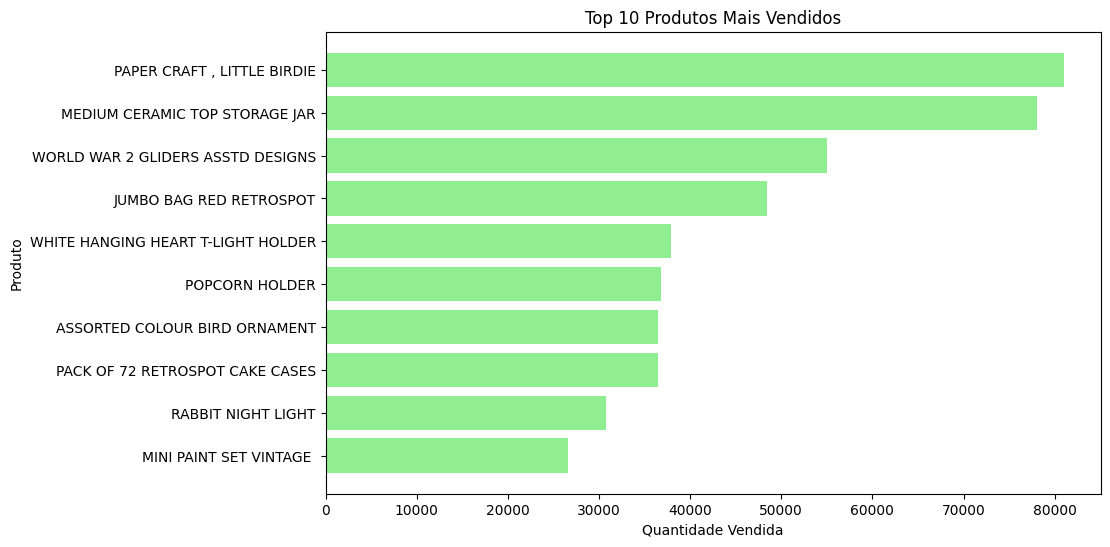

In [89]:
# Top 10 produtos mais vendidos

product_sales = dados.groupby('Description')['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values('Quantity', ascending=False)
top_10_products = product_sales.head(10)
print(top_10_products)

plt.figure(figsize=(10, 6))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='lightgreen')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Vendidos')
plt.gca().invert_yaxis()
plt.show()

      Month   TotalPrice
0   2010-12   823746.140
1   2011-01   691364.560
2   2011-02   523631.890
3   2011-03   717639.360
4   2011-04   537808.621
5   2011-05   770536.020
6   2011-06   761739.900
7   2011-07   719221.191
8   2011-08   759138.380
9   2011-09  1058590.172
10  2011-10  1154979.300
11  2011-11  1509496.330
12  2011-12   638792.680


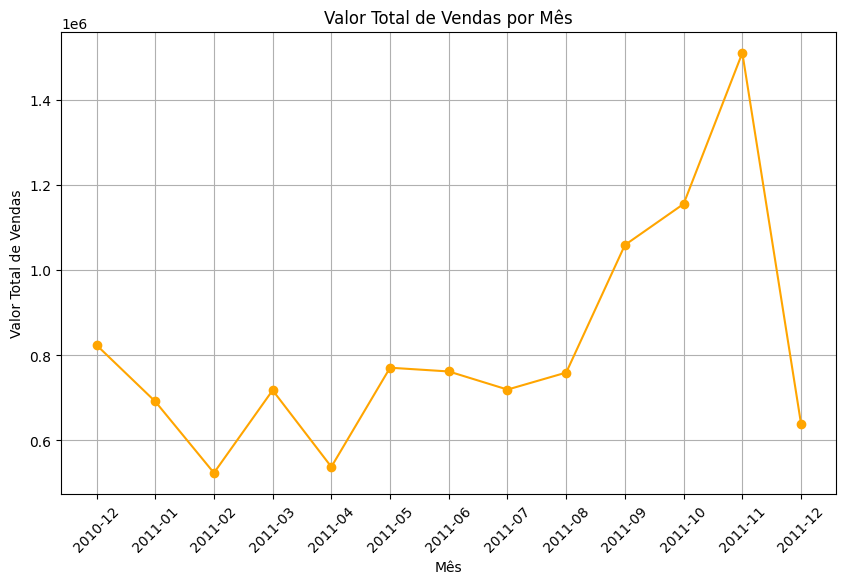

In [95]:
# Valor de venda total por mês

dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])
dados['Month'] = dados['InvoiceDate'].dt.to_period('M')
monthly_sales = dados.groupby('Month')['TotalPrice'].sum().reset_index()
print(monthly_sales)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalPrice'], marker='o', color='orange')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

       Month         Country  TotalPrice
0    2010-12       Australia     1032.85
1    2010-12         Belgium     1809.91
2    2010-12            EIRE    10033.26
3    2010-12          France     9616.31
4    2010-12         Germany    15241.14
..       ...             ...         ...
123  2011-12         Germany     7984.17
124  2011-12     Netherlands    11728.02
125  2011-12           Spain      316.21
126  2011-12          Sweden      238.00
127  2011-12  United Kingdom   592622.09

[128 rows x 3 columns]


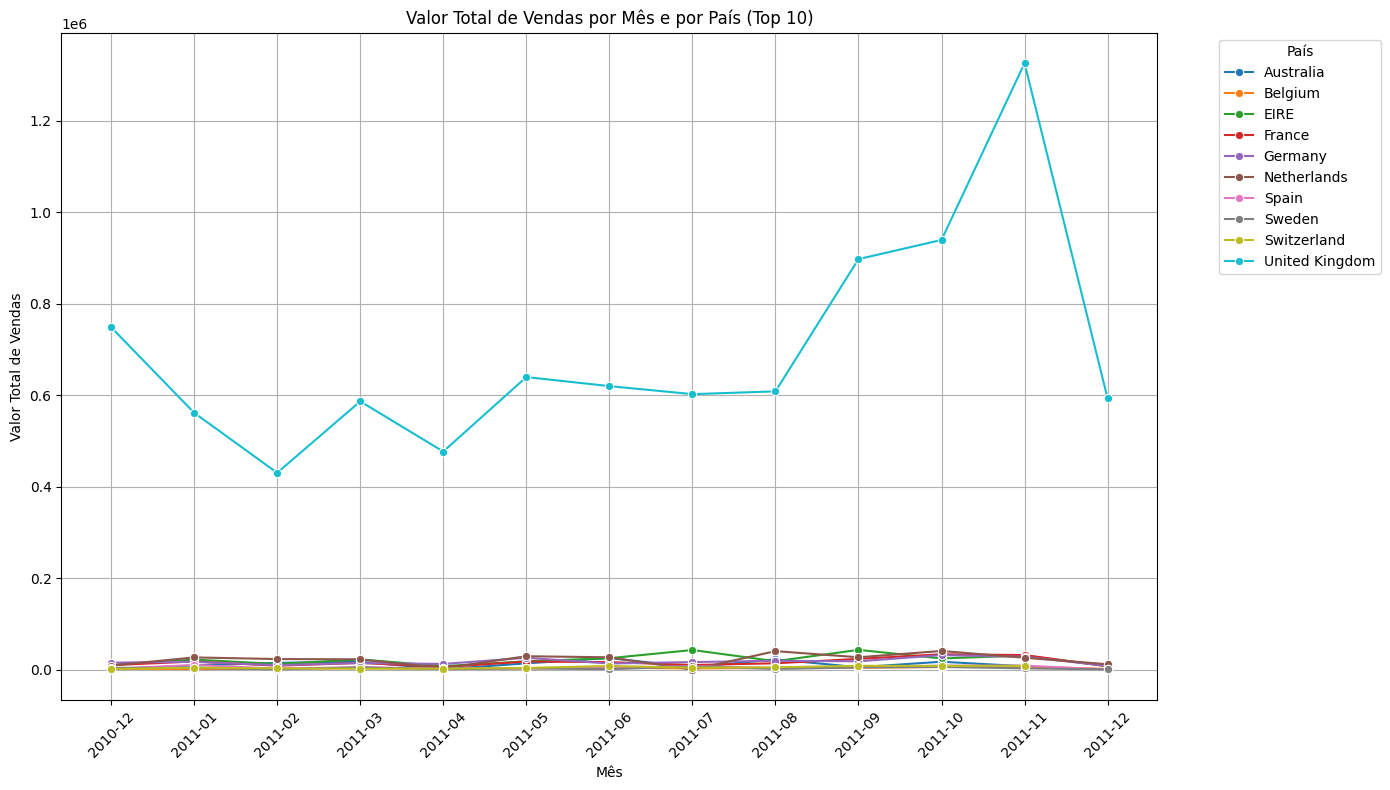

In [101]:
# Valor de venda total por mês e por país (apenas os top 10)

top_10_countries_list = top_10_countries['Country'].tolist()
dados_top_10_countries = dados[dados['Country'].isin(top_10_countries_list)].copy()
dados_top_10_countries['Month'] = pd.to_datetime(dados_top_10_countries['InvoiceDate']).dt.to_period('M').astype(str)
monthly_country_sales = dados_top_10_countries.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()
print(monthly_country_sales)

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_country_sales, x='Month', y='TotalPrice', hue='Country', marker='o', palette='tab10')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês e por País (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **ETAPA 10**

In [109]:
# Cálculo do RFM

dados_rfm = dados.groupby(['CustomerID', 'InvoiceNo']).agg(
    InvoiceDate=('InvoiceDate', 'max'),
    TotalPrice=('TotalPrice', 'sum')
).reset_index()
print(dados_rfm)

# Calcular a Recência:

last_purchase_date = dados_rfm['InvoiceDate'].max()
dados_rfm['Recency'] = (last_purchase_date - dados_rfm['InvoiceDate']).dt.days

# Calcular a Frequência

dados_rfm_f = dados_rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
dados_rfm_f.columns = ['CustomerID', 'Frequency']

#Calcular o Ticket Médio:

dados_rfm_m = dados_rfm.groupby('CustomerID')['TotalPrice'].mean().reset_index()
dados_rfm_m.columns = ['CustomerID', 'Monetary']

# Agrupamento:

dados_rfm_final = pd.merge(dados_rfm_f, dados_rfm_m, on='CustomerID', how='left')
dados_rfm_final = pd.merge(dados_rfm_final, dados_rfm[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID', how='left')

# Resultado RFM:
dados_rfm_final.head()


       CustomerID InvoiceNo         InvoiceDate  TotalPrice
0         12346.0    541431 2011-01-18 10:01:00    77183.60
1         12347.0    537626 2010-12-07 14:57:00      711.79
2         12347.0    542237 2011-01-26 14:30:00      475.39
3         12347.0    549222 2011-04-07 10:43:00      636.25
4         12347.0    556201 2011-06-09 13:01:00      382.52
...           ...       ...                 ...         ...
18527     18283.0    579673 2011-11-30 12:59:00      223.61
18528     18283.0    580872 2011-12-06 12:02:00      208.00
18529     18287.0    554065 2011-05-22 10:39:00      765.28
18530     18287.0    570715 2011-10-12 10:23:00     1001.32
18531     18287.0    573167 2011-10-28 09:29:00       70.68

[18532 rows x 4 columns]


,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.600000,325
1,12347.0,7,615.714286,366
2,12347.0,7,615.714286,316
3,12347.0,7,615.714286,246
4,12347.0,7,615.714286,182


In [108]:
dados_rfm['Recency'] = (last_purchase_date - dados_rfm['InvoiceDate']).dt.days